In [1]:
import pandas as pd

In [10]:
df_data7 = pd.read_csv('Data7.csv')

In [11]:
df_data7.drop(columns=df_data7.columns[0],axis=1,inplace=True)
df_data7.loc[df_data7['Class']==1,'Class']=0
df_data7.loc[df_data7['Class']==2,'Class']=1
df_data7.loc[df_data7['Class']==3,'Class']=2
df_data7.loc[df_data7['Class']==4,'Class']=3
df_data7.loc[df_data7['Class']==5,'Class']=4
df_data7.loc[df_data7['Class']==6,'Class']=5
df_data7

,X1,X2,Class
0,-3.000000,-3.000000,4
1,-3.000000,3.000000,3
2,3.000000,-3.000000,5
3,3.000000,3.000000,2
4,-0.417091,0.114782,0
...,...,...,...
765,-1.604434,-1.118861,1
766,-3.050000,-3.050000,4
767,-3.050000,2.950000,3
768,2.950000,-3.050000,5


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


SSE model_data5 Data: 1405.3501173565396
SSE model_data5 Data: 1017.4634544848177
SSE model_data5 Data: 711.7754907114008
SSE model_data5 Data: 501.4925629783542
SSE model_data5 Data: 340.09558695312677
SSE model_data5 Data: 274.3632484694391
SSE model_data5 Data: 230.06044742400692
SSE model_data5 Data: 208.19966646849392
SSE model_data5 Data: 177.71086827080393


C:\Users\aryan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

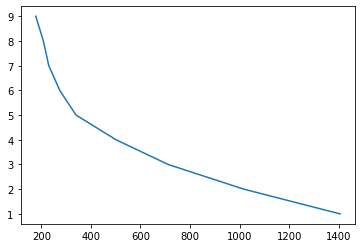

In [13]:
#elbow method
# finding the value of k
from sklearn.cluster import KMeans
ans = []
for i in range(1,10):
    model_data7 = KMeans(n_clusters=i)
    model_data7.fit(df_data7.iloc[:,0:2])
    print('SSE model_data5 Data: '+ str(model_data7.inertia_))
    t = model_data7.inertia_
    ans.append(t)
import seaborn as sns
sns.lineplot(ans,range(1,10))

In [19]:
from sklearn import metrics
for i in range(2,10):
    model_data7 = KMeans(n_clusters=i)
    model_data7.fit(df_data7.iloc[:,0:2])
    print('SHScore Data6: '+str(i)+':'+ str(metrics.silhouette_score(df_data7.iloc[:,0:2], model_data7.labels_)))

SHScore Data6: 2:0.42048829036107754
SHScore Data6: 3:0.45516940141390333
SHScore Data6: 4:0.5166577822810843
SHScore Data6: 5:0.5690622685496076
SHScore Data6: 6:0.5818884308573596
SHScore Data6: 7:0.5849645070459994
SHScore Data6: 8:0.5864066693325528
SHScore Data6: 9:0.5910382344186987


In [21]:
#going with k = 5
model_data7 = KMeans(n_clusters=5)
model_data7.fit(df_data7.iloc[:,0:2])

KMeans(n_clusters=5)

<AxesSubplot:xlabel='X1', ylabel='X2'>

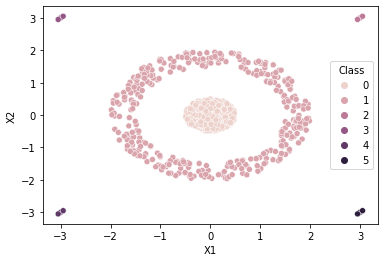

In [20]:
import seaborn as sns
sns.scatterplot(x='X1', y='X2', data=df_data7, hue='Class')

<AxesSubplot:xlabel='X1', ylabel='X2'>

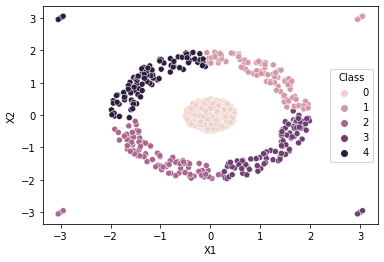

In [22]:
df_data7_predicted=df_data7.iloc[:,0:2]
df_data7_predicted['Class']= model_data7.labels_
sns.scatterplot(x='X1', y='X2', data=df_data7_predicted, hue='Class')